# Getting Started 

What does a typical file look like?

In [1]:
!head 'data/measured_real_power.csv'

# file...... measured_real_power.csv
# date...... Tue Aug 11 13:56:33 2015
# user...... mlunacek
# host...... (null)
# group..... class=house
# property.. measured_real_power
# limit..... 0
# interval.. 60
# timestamp,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
2013-07-01 00:00:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677


Read with pandas

In [17]:
import pandas as pd

filename = 'data/measured_real_power.csv'
df = pd.read_csv(filename, skiprows=8)

What's this look like?

In [18]:
df.shape

(12961, 21)

In [19]:
df.head()

,# timestamp,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,...,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
0,2013-07-01 00:00:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
1,2013-07-01 00:01:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2,2013-07-01 00:02:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
3,2013-07-01 00:03:00 UTC,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,...,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
4,2013-07-01 00:04:00 UTC,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,...,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


Clean this up a bit..

In [20]:
df = df.rename(columns={'# timestamp': 'timestamp'})
df.columns

Index([u'timestamp', u'triplex_meter_0', u'triplex_meter_1',
       u'triplex_meter_2', u'triplex_meter_3', u'triplex_meter_4',
       u'triplex_meter_5', u'triplex_meter_6', u'triplex_meter_7',
       u'triplex_meter_8', u'triplex_meter_9', u'triplex_meter_10',
       u'triplex_meter_11', u'triplex_meter_12', u'triplex_meter_13',
       u'triplex_meter_14', u'triplex_meter_15', u'triplex_meter_16',
       u'triplex_meter_17', u'triplex_meter_18', u'triplex_meter_19'],
      dtype='object')

Convert to `datetime`.

In [21]:
#df['timestamp']

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Set the index

In [23]:
df.set_index('timestamp', inplace=True)
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


In [26]:
#df.resample("60min").mean()

Create a read function

In [27]:
%%writefile utils.py

import pandas as pd

def read_csv(filename):
    df = pd.read_csv(filename, skiprows=8)
    df.rename(columns={'# timestamp': 'timestamp'}, inplace=True)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    return df


Overwriting utils.py


In [28]:
import utils
df = utils.read_csv('data/measured_real_power.csv')
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


## Questions 

What does the raw data look like?

In [35]:
df.columns

Index([u'triplex_meter_0', u'triplex_meter_1', u'triplex_meter_2',
       u'triplex_meter_3', u'triplex_meter_4', u'triplex_meter_5',
       u'triplex_meter_6', u'triplex_meter_7', u'triplex_meter_8',
       u'triplex_meter_9', u'triplex_meter_10', u'triplex_meter_11',
       u'triplex_meter_12', u'triplex_meter_13', u'triplex_meter_14',
       u'triplex_meter_15', u'triplex_meter_16', u'triplex_meter_17',
       u'triplex_meter_18', u'triplex_meter_19'],
      dtype='object')

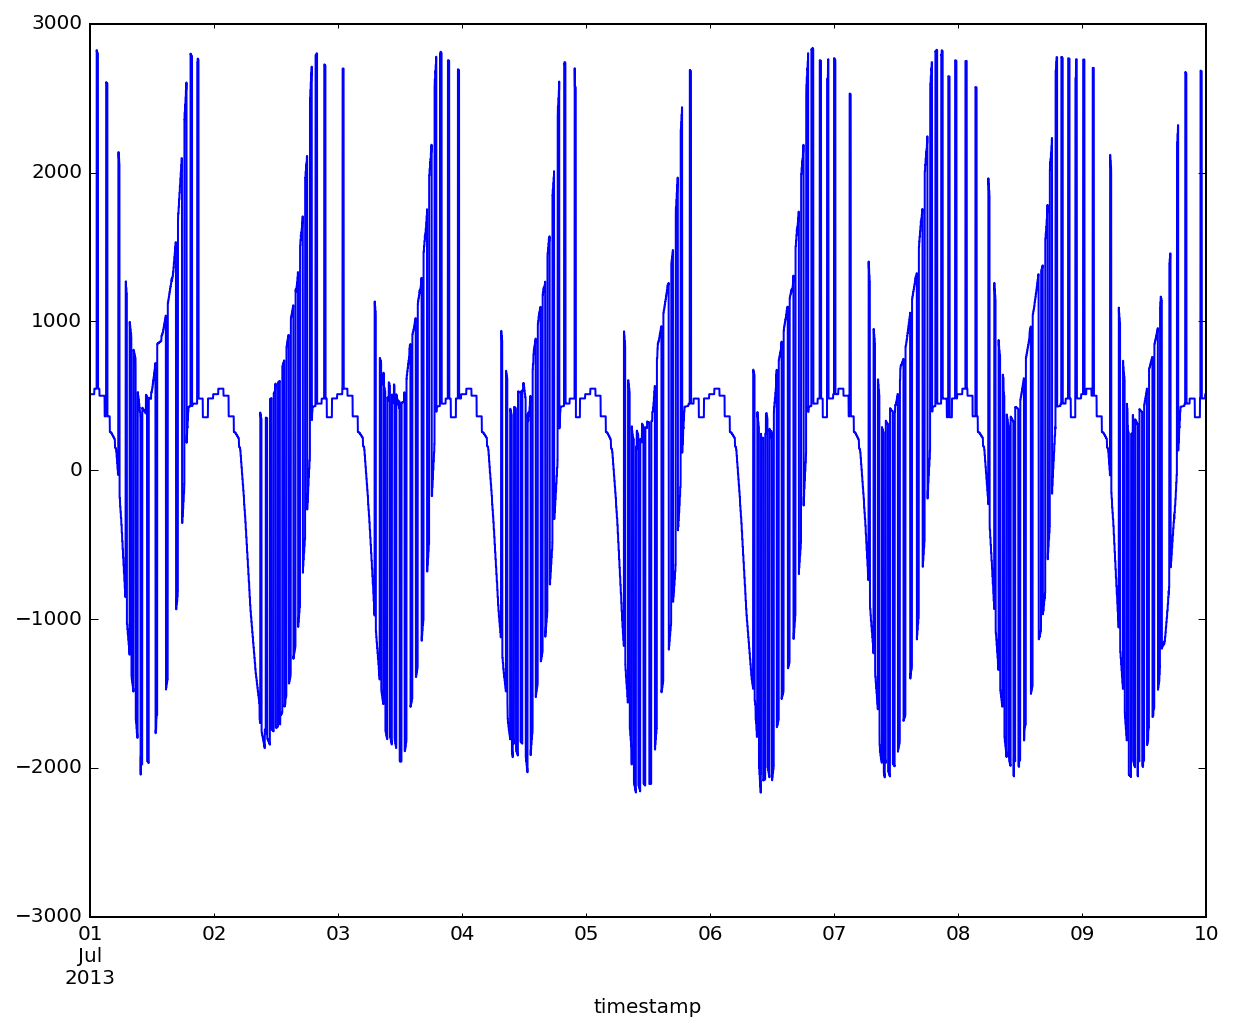

In [38]:
df["triplex_meter_0"].plot(legend=False)

What's the average house temperature over time?

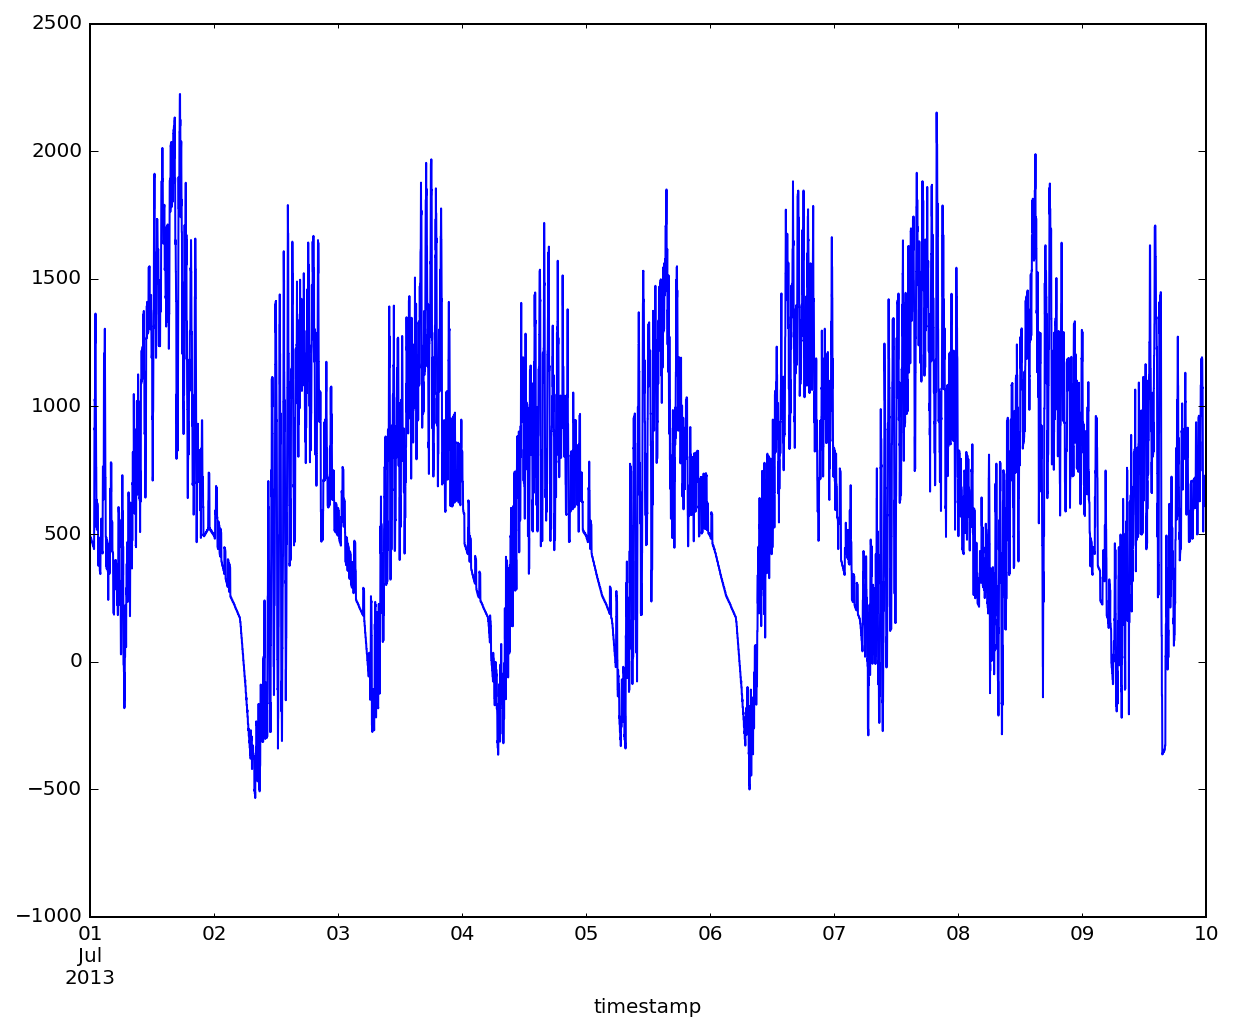

In [39]:
df.mean(axis=1).plot()

Which house has the highest air temperature?

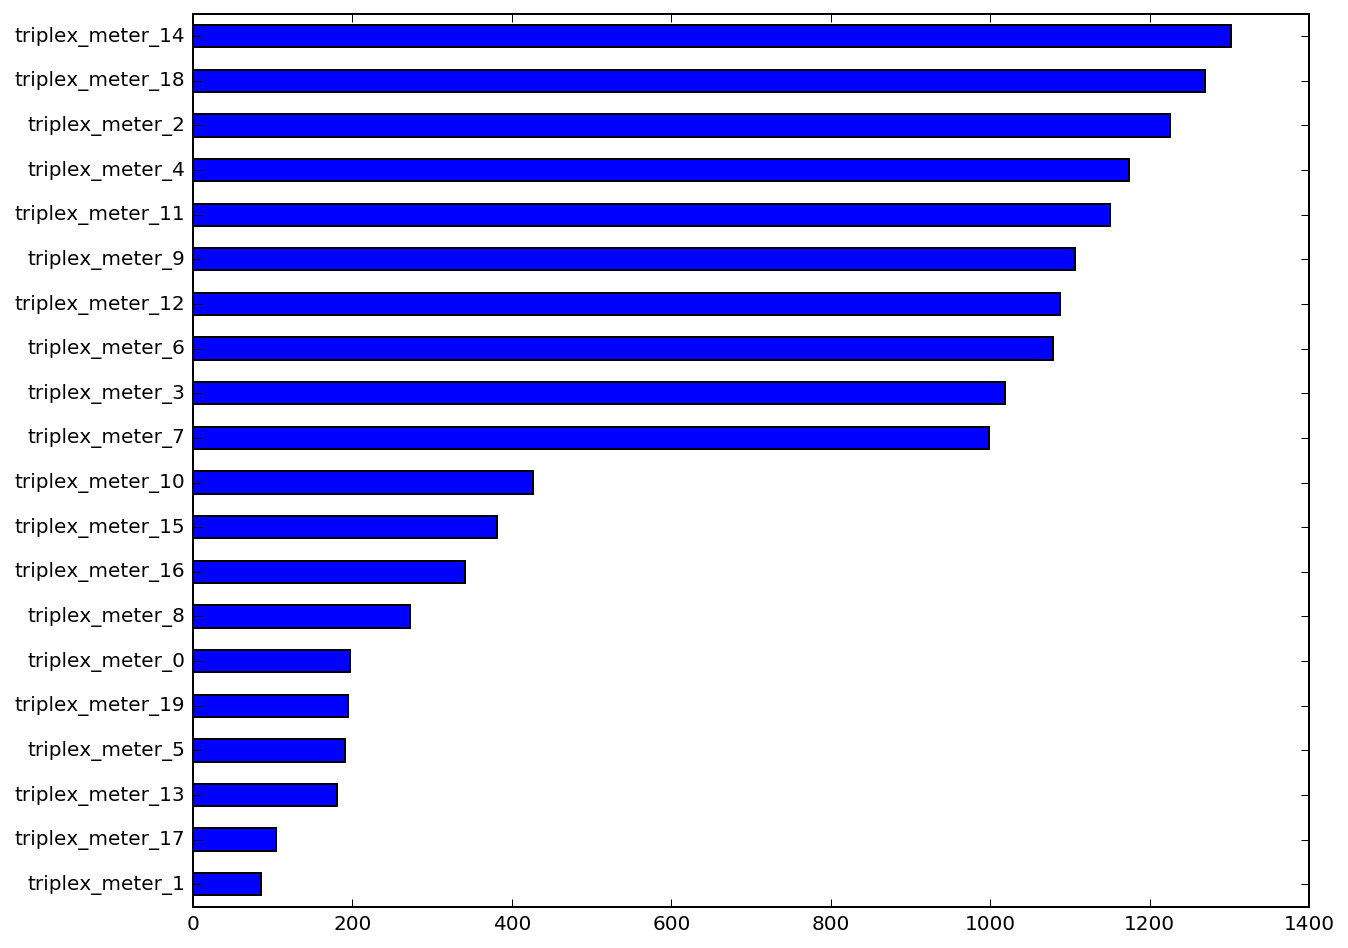

In [40]:
md = df.mean(axis=0)
md.sort_values(ascending=True).plot(kind='barh')

Box plot of `house_0`, `house_1`, `house_2`, and `house_3`.

In [41]:
df[['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2', 'triplex_meter_3']].head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3
timestamp,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924
2013-07-01 00:01:00,510.912,510.912,510.912,547.924
2013-07-01 00:02:00,510.912,510.912,510.912,547.924
2013-07-01 00:03:00,510.912,510.912,510.912,547.924
2013-07-01 00:04:00,510.911,510.911,510.911,547.922


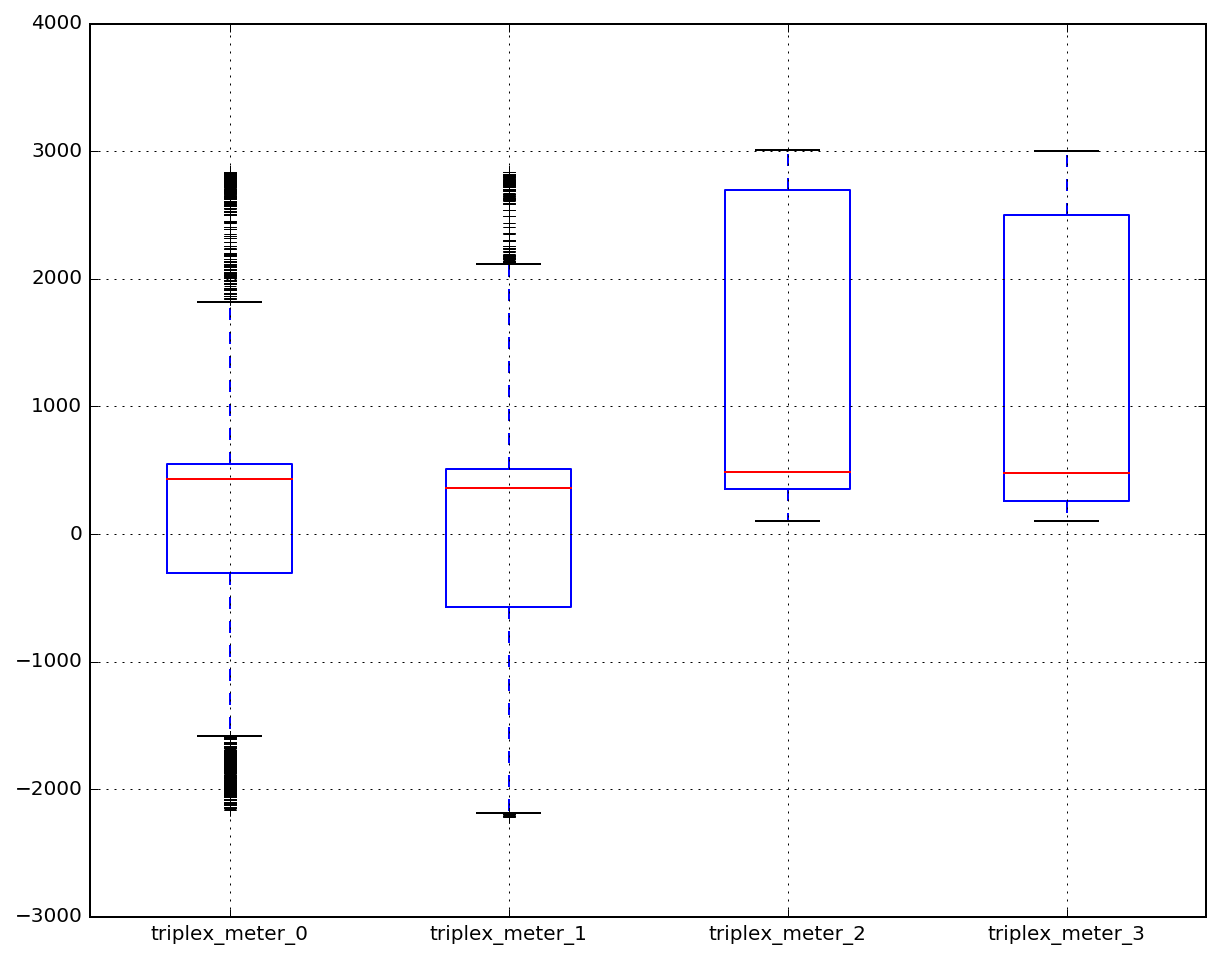

In [46]:
_ = df[['triplex_meter_0', 'triplex_meter_1', 'triplex_meter_2', 'triplex_meter_3']].boxplot(return_type='axes')

In [44]:
"word {} {}".format(1, "hello")

'word 1 hello'

In [45]:
[ "triplex_meter_{}".format(x) for x in range(5)]

['triplex_meter_0',
 'triplex_meter_1',
 'triplex_meter_2',
 'triplex_meter_3',
 'triplex_meter_4']

What is the average temperature of each house over time?

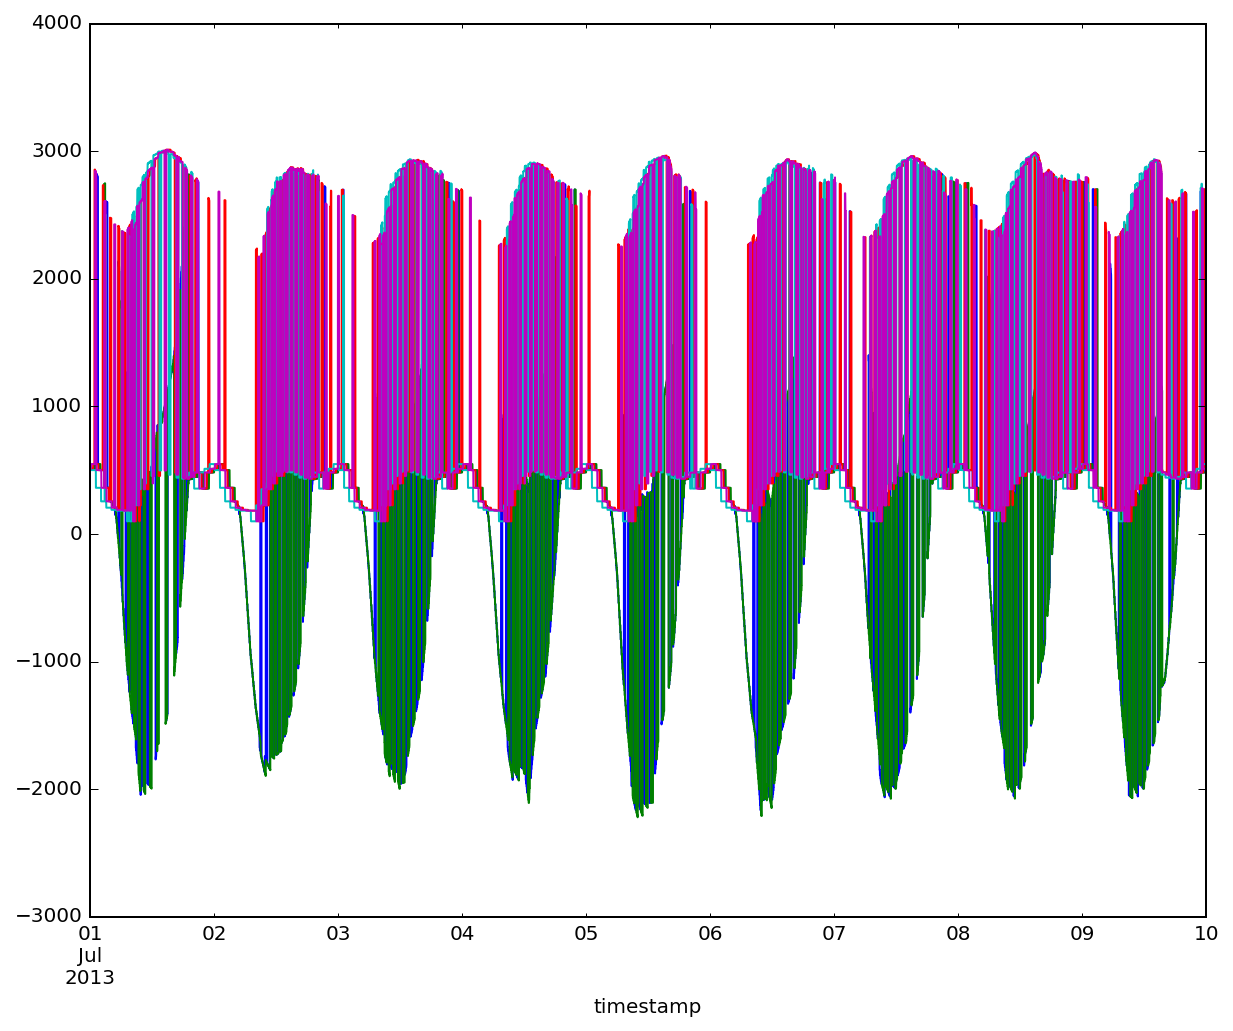

In [15]:
tmp = df[[ "triplex_meter_{}".format(x) for x in range(5)]]
_ = tmp.plot(legend=False)

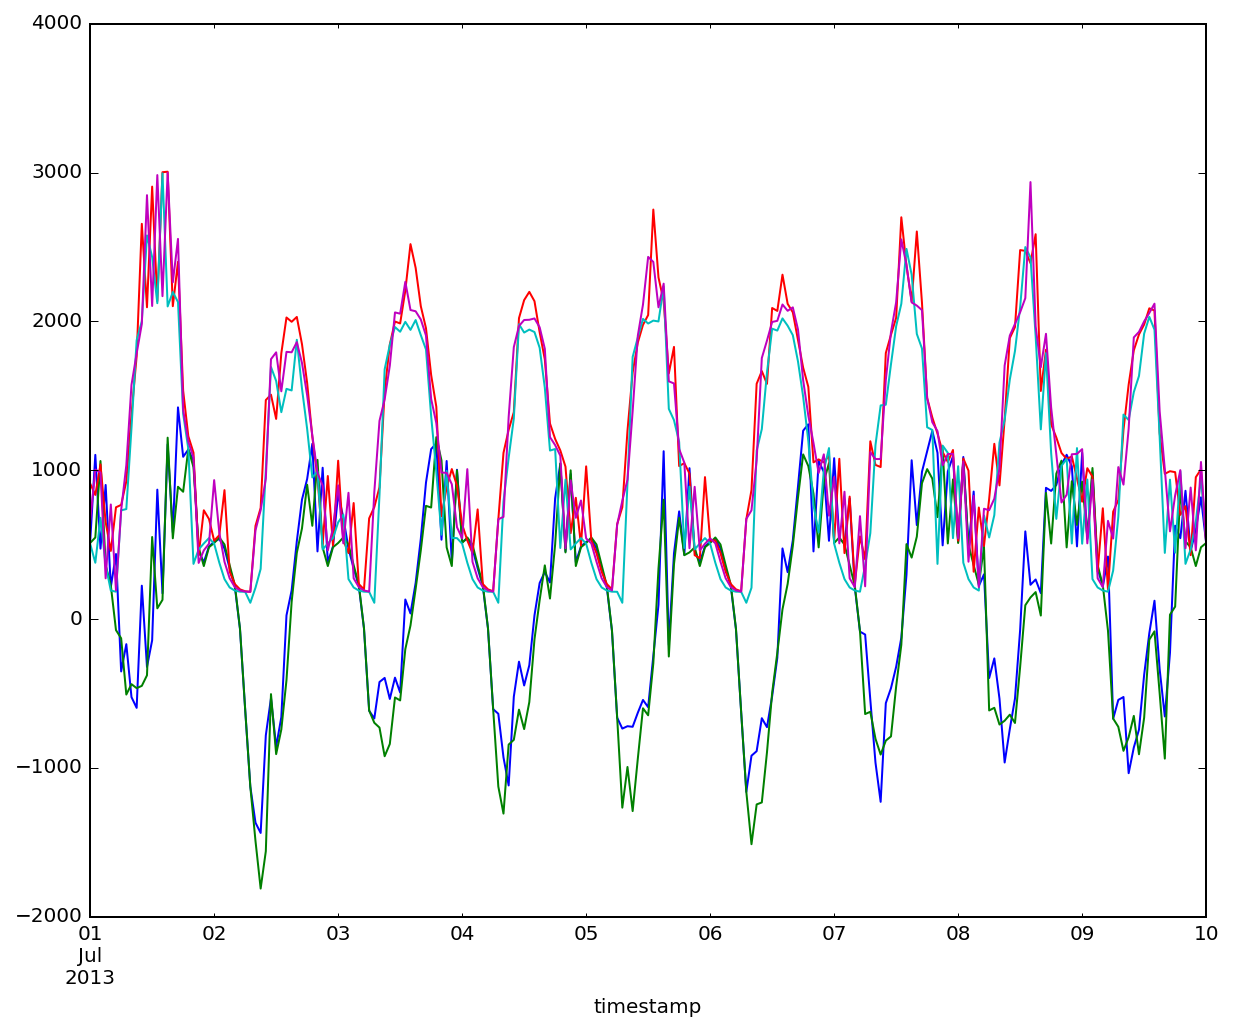

In [16]:
tmp.resample('60min').mean().plot(legend=False)

What does July 5th look like? 

In [17]:
df.index

DatetimeIndex(['2013-07-01 00:00:00', '2013-07-01 00:01:00',
               '2013-07-01 00:02:00', '2013-07-01 00:03:00',
               '2013-07-01 00:04:00', '2013-07-01 00:05:00',
               '2013-07-01 00:06:00', '2013-07-01 00:07:00',
               '2013-07-01 00:08:00', '2013-07-01 00:09:00',
               ...
               '2013-07-09 23:51:00', '2013-07-09 23:52:00',
               '2013-07-09 23:53:00', '2013-07-09 23:54:00',
               '2013-07-09 23:55:00', '2013-07-09 23:56:00',
               '2013-07-09 23:57:00', '2013-07-09 23:58:00',
               '2013-07-09 23:59:00', '2013-07-10 00:00:00'],
              dtype='datetime64[ns]', name=u'timestamp', length=12961, freq=None)

In [18]:
df['triplex_meter_0'].head()

timestamp
2013-07-01 00:00:00    510.912
2013-07-01 00:01:00    510.912
2013-07-01 00:02:00    510.912
2013-07-01 00:03:00    510.912
2013-07-01 00:04:00    510.911
Name: triplex_meter_0, dtype: float64

In [19]:
df.ix['2013-07-05', 'triplex_meter_0'].tail()

timestamp
2013-07-05 23:55:00    510.919
2013-07-05 23:56:00    510.919
2013-07-05 23:57:00    510.916
2013-07-05 23:58:00    510.916
2013-07-05 23:59:00    510.916
Name: triplex_meter_0, dtype: float64

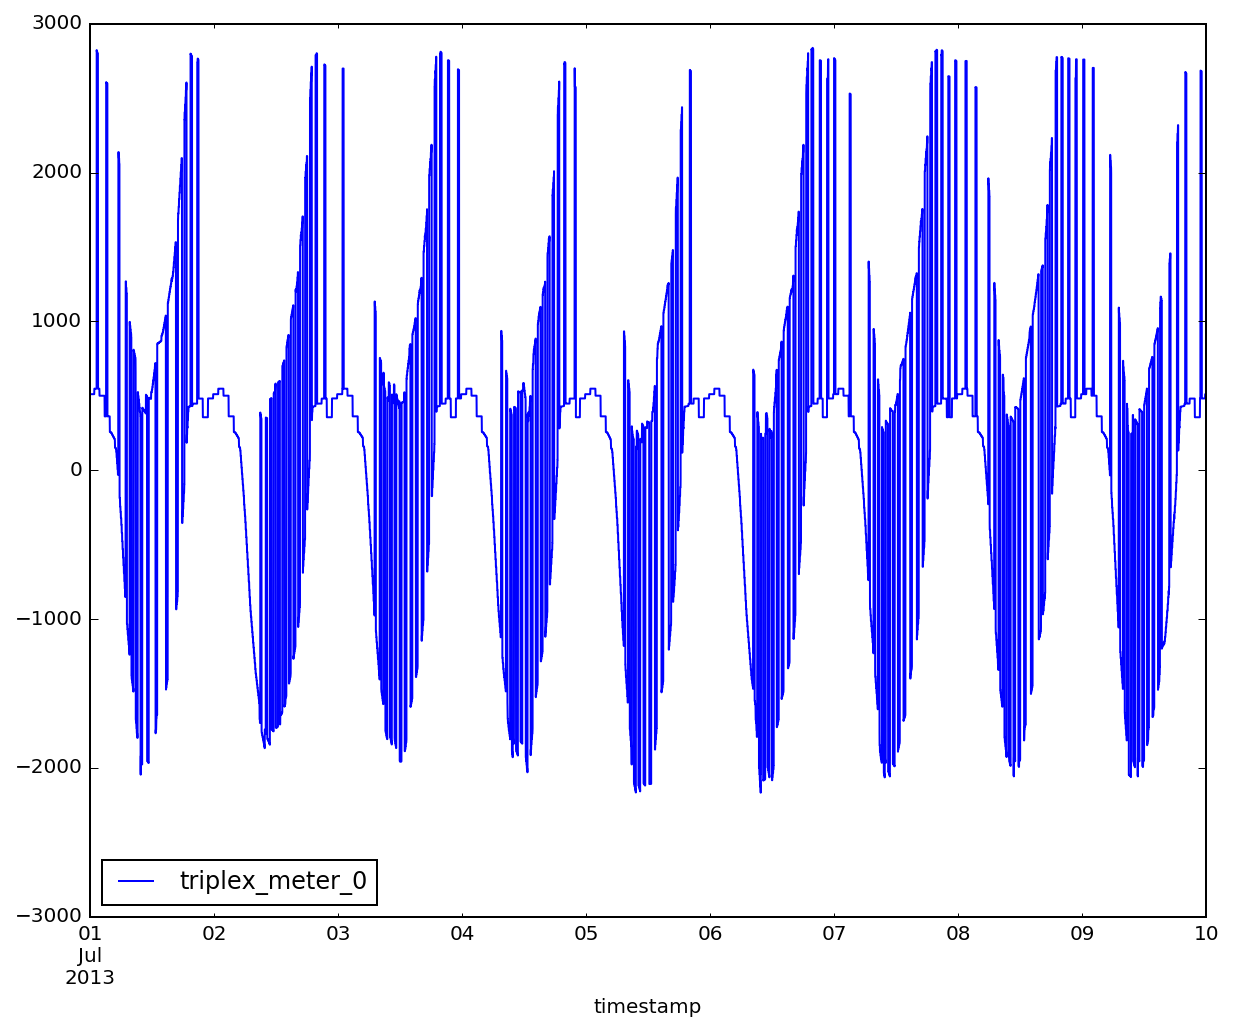

In [48]:
df[['triplex_meter_0']].plot()

In [50]:
df[['triplex_meter_0']].to_csv("tmp.csv")

In [ ]:
!head tmp.csv